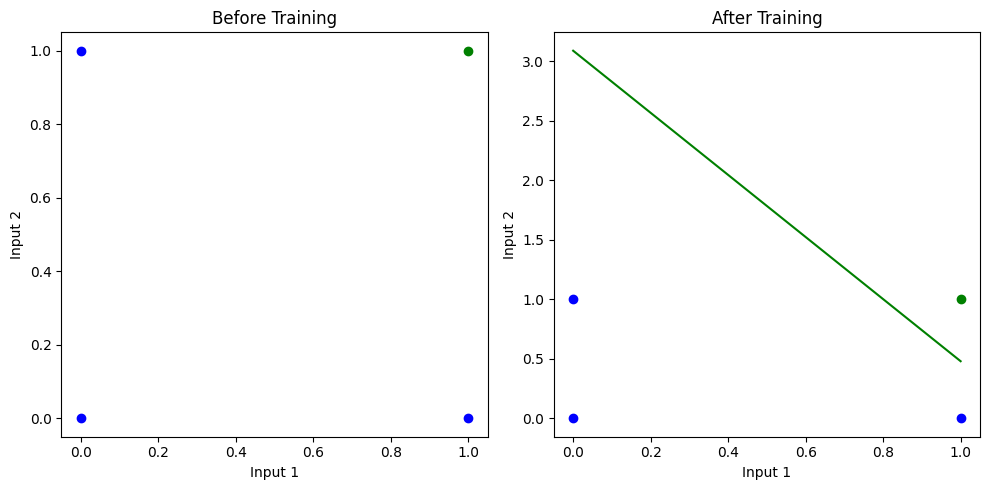

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)

# XOR truth table inputs and labels
NAND_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
NAND_labels = np.array([1, 1, 1, 0])

# Initialize and train perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(NAND_inputs, NAND_labels, epochs=1000)

# Plot decision boundary before training
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Before Training')
plt.xlabel('Input 1')
plt.ylabel('Input 2')

for i in range(len(NAND_labels)):
    if NAND_labels[i] == 1:
        plt.scatter(NAND_inputs[i][0], NAND_inputs[i][1], color='blue')
    else:
        plt.scatter(NAND_inputs[i][0], NAND_inputs[i][1], color='GREEN')

# Plot decision boundary after training
plt.subplot(1, 2, 2)
plt.title('After Training')
plt.xlabel('Input 1')
plt.ylabel('Input 2')

for i in range(len(NAND_labels)):
    if NAND_labels[i] == 1:
        plt.scatter(NAND_inputs[i][0], NAND_inputs[i][1], color='blue')
    else:
        plt.scatter(NAND_inputs[i][0], NAND_inputs[i][1], color='GREEN')

# Plot decision boundary (line defined by weights and bias)
x_vals = np.linspace(0, 1, 100)
y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
plt.plot(x_vals, y_vals, color='green')

plt.tight_layout()
plt.show()
